In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dsaditya","key":"92c1dc7f098a4b380aaba5ae0f3c682d"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                 146KB  2023-10-05 06:45:37           7499        181  1.0              
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                  47KB  2023-08-26 11:04:57          35493       1063  1.0              
muhammadawaistayyab/amazon-movies-and-films                 Amazon- Movies and Films                          92KB  2023-10-15 01:42:04            972         38  1.0              
willianoliveiragibin/10000-data-abo

In [3]:
! kaggle competitions download -c bike-sharing-demand

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from google.colab import drive
drive.mount("/content/drive")
! mkdir kaggle_data
! unzip {"bike-sharing-demand.zip"} -d kaggle_data

# Unmount your Google Drive
drive.flush_and_unmount()

Mounted at /content/drive
mkdir: cannot create directory ‘kaggle_data’: File exists
Archive:  bike-sharing-demand.zip
replace kaggle_data/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: kaggle_data/sampleSubmission.csv  
  inflating: kaggle_data/test.csv    
  inflating: kaggle_data/train.csv   


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [6]:
train_df = pd.read_csv('kaggle_data/train.csv')
test_df = pd.read_csv('kaggle_data/test.csv')

In [7]:
train = train_df.copy()
test = test_df.copy()

In [8]:
train_df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [9]:
train_df.shape

(10886, 12)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
train_df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [12]:
train_df.rename(columns={'count': 'total_count'}, inplace=True)

In [13]:
pd.DataFrame(train_df.describe().loc['mean'] - train_df.describe().loc['50%'])

0
season       -0.493386
holiday       0.028569
workingday   -0.319125
weather       0.418427
temp         -0.269140
atemp        -0.584916
humidity     -0.113540
windspeed    -0.198605
casual       19.021955
registered   37.552177
total_count  46.574132

In [14]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  int64         
 2   holiday      10886 non-null  int64         
 3   workingday   10886 non-null  int64         
 4   weather      10886 non-null  int64         
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  total_count  10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [16]:
num_cols = ['temp', 'atemp', 'windspeed', 'humidity', 'casual', 'registered', 'total_count']
cat_cols = ['season', 'holiday', 'workingday', 'weather']

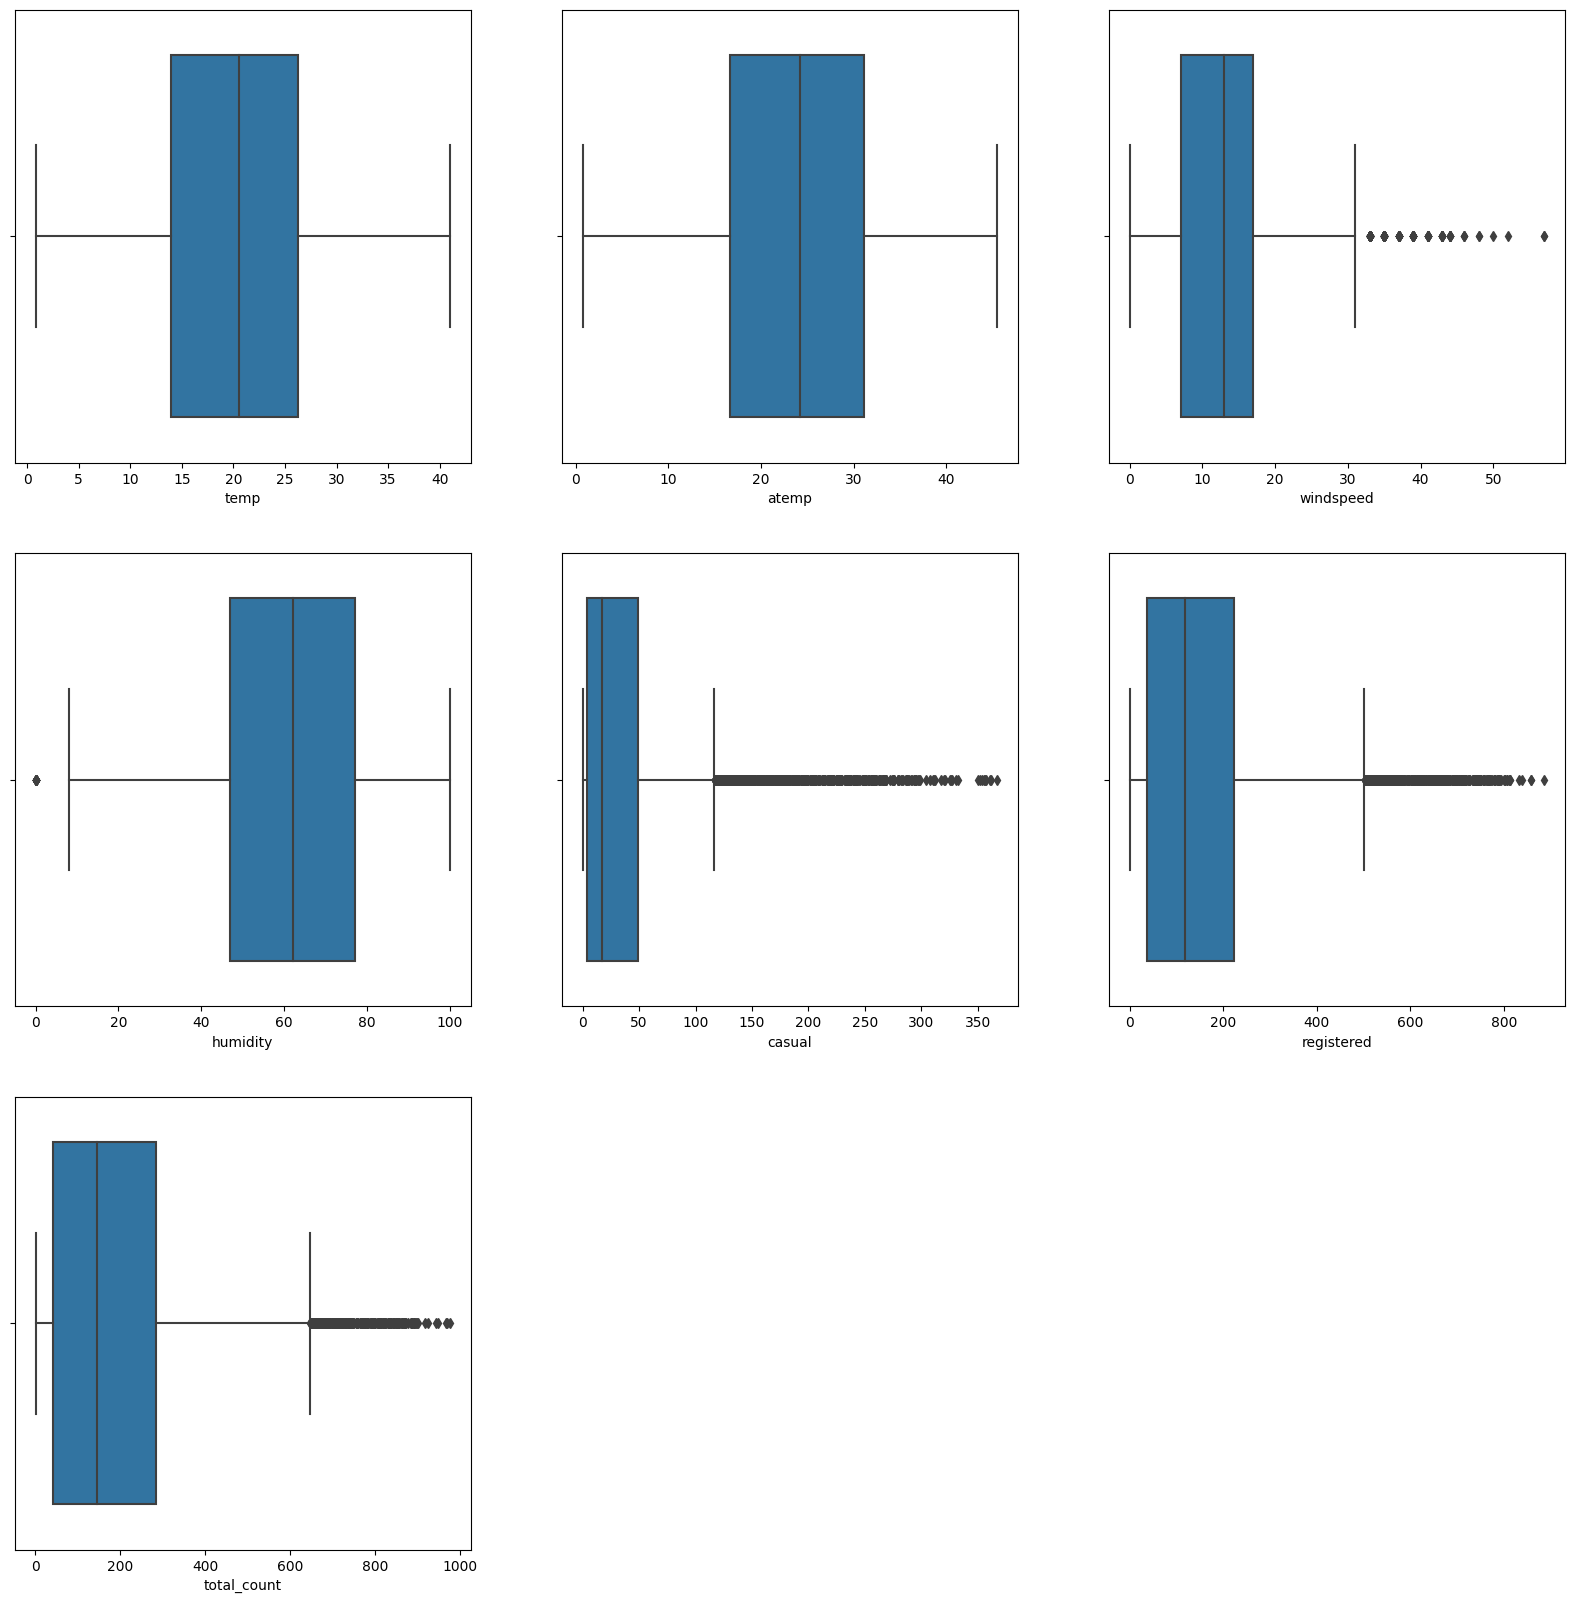

In [17]:
# Outliers detection using boxplot.
plt.figure(figsize=(20,20))
for c in range(0,len(num_cols)):
    plt.subplot(3,3,c+1)
    sns.boxplot(data=train_df,x=num_cols[c])

In [18]:
fig = px.histogram(data_frame=train_df, x='season', color_discrete_sequence=px.colors.qualitative.T10, height=400)
fig.update_layout(
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Season Distribution',
    yaxis_title_text='Count of season',
    bargap=0.5
)
fig.show()

In [19]:
fig = px.pie(data_frame=train_df, names=train_df['holiday'].value_counts().index, values=train_df['holiday'].value_counts().values, hole=0.5, color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(
    autosize=True, height=400, width=500,
    margin=dict(t=80, b=30, l=70, r=40),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Holiday Distribution'
)
fig.show()

In [20]:
fig = px.pie(data_frame=train_df, names=train_df['workingday'].value_counts().index, values=train_df['workingday'].value_counts().values, hole=0.5, color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(
    autosize=True, height=400, width=500,
    margin=dict(t=80, b=30, l=70, r=40),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Working Day Distribution'
)
fig.show()

In [21]:
train_df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [22]:
fig = px.histogram(data_frame=train_df, x='weather', color_discrete_sequence=px.colors.qualitative.T10, height=400)
fig.update_layout(
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Season Distribution',
    yaxis_title_text='Count of season',
    bargap=0.5
)
fig.show()

In [23]:
fig = px.pie(data_frame=train_df, names=train_df['weather'].value_counts().index, values=train_df['weather'].value_counts().values, hole=0.5, color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(
    autosize=True, height=400, width=500,
    margin=dict(t=80, b=30, l=70, r=40),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Working Day Distribution'
)
fig.show()

In [24]:
import plotly.figure_factory as ff

In [25]:
fig = ff.create_distplot([train_df['temp']], ['temp'])
fig.show()

In [26]:
fig = ff.create_distplot([train_df['atemp']], ['atemp'])
fig.show()

In [27]:
fig = ff.create_distplot([train_df['humidity']], ['humidity'])
fig.show()

In [28]:
fig = ff.create_distplot([train_df['windspeed']], ['windspeed'])
fig.show()

In [29]:
px.histogram(train_df,'windspeed')

In [30]:
px.histogram(train_df,'casual')

In [31]:
fig = ff.create_distplot([train_df['casual']], ['casual'])
fig.show()

In [32]:
px.histogram(train_df,'registered')

In [33]:
fig = ff.create_distplot([train_df['registered']], ['registered'])
fig.show()

In [34]:
px.histogram(train_df,x=train_df['total_count'])

In [35]:
fig = ff.create_distplot([train_df['total_count']], ['total_count'])
fig.show()

In [36]:
train_df['datetime'].min(), train_df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [37]:
train_df['year'] = train_df['datetime'].dt.year

In [38]:
train_df['month'] = train_df['datetime'].dt.month

In [39]:
train_df['date'] = train_df['datetime'].dt.day

In [40]:
train_df['day'] = train_df['datetime'].dt.day_name()

In [41]:
train_df['hour'] = train_df['datetime'].dt.hour

In [42]:
train_df['week'] = train_df['datetime'].dt.weekofyear

In [43]:
train_df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  total_count  year  month  date  \
0        81        0.0       3          13           16  2011      1     1   
1        80        0.0       8          32           40  2011      1     1   
2        80        0.0       5          27           32  2011      1     1   
3        75        0.0       3          10           13  2011      1     1   
4        75        0.0       0           1            1  2011      1     1   

        day  hour  week  
0  Saturday     0    52  
1  Saturday     1    52  
2  Saturday     2    52  
3  Saturday     3    52  
4  Saturday     4    52

In [44]:
fig = px.histogram(data_frame=train_df, x='year', color_discrete_sequence=px.colors.qualitative.T10, height=400)
fig.update_layout(
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Season Distribution',
    yaxis_title_text='Count of season',
    bargap=0.5
)
fig.show()

In [45]:
fig = px.histogram(data_frame=train_df, x='month', color_discrete_sequence=px.colors.qualitative.T10, height=400)
fig.update_layout(
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Season Distribution',
    yaxis_title_text='Count of season',
    bargap=0.5
)
fig.show()

In [46]:
fig = px.histogram(data_frame=train_df, x='date', color_discrete_sequence=px.colors.qualitative.T10, height=400)
fig.update_layout(
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Season Distribution',
    yaxis_title_text='Count of season',
    bargap=0.5
)
fig.show()

In [47]:
fig = px.histogram(data_frame=train_df, x='day', color_discrete_sequence=px.colors.qualitative.T10, height=400)
fig.update_layout(
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Season Distribution',
    yaxis_title_text='Count of season',
    bargap=0.5
)
fig.show()

In [48]:
fig = px.histogram(data_frame=train_df, x='hour', color_discrete_sequence=px.colors.qualitative.T10, height=400)
fig.update_layout(
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    title='Season Distribution',
    yaxis_title_text='Count of season',
    bargap=0.5
)
fig.show()

In [49]:
px.line(x=train_df['datetime'].dt.date.unique(), y=train_df.groupby(train_df['datetime'].dt.date).sum()['total_count'])

In [50]:
px.line(x=train_df['datetime'].dt.date.unique(), y=train_df.groupby(train_df['datetime'].dt.date).sum()['casual'])

In [51]:
px.line(x=train_df['datetime'].dt.date.unique(), y=train_df.groupby(train_df['datetime'].dt.date).sum()['registered'])

In [52]:
px.box(train_df, x='season', y='total_count')

In [53]:
px.box(train_df, x='weather', y='total_count')

In [54]:
px.box(train_df, x='holiday', y='total_count')

In [55]:
px.box(train_df, x='workingday', y='total_count')

In [56]:
train_df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  total_count  year  month  date  \
0        81        0.0       3          13           16  2011      1     1   
1        80        0.0       8          32           40  2011      1     1   
2        80        0.0       5          27           32  2011      1     1   
3        75        0.0       3          10           13  2011      1     1   
4        75        0.0       0           1            1  2011      1     1   

        day  hour  week  
0  Saturday     0    52  
1  Saturday     1    52  
2  Saturday     2    52  
3  Saturday     3    52  
4  Saturday     4    52

In [57]:
px.histogram(train_df, y='total_count', x='humidity', histfunc="avg")

In [58]:
px.histogram(train_df, y='total_count', x='temp', histfunc="avg")

In [59]:
px.histogram(train_df, y='total_count', x='atemp', histfunc="avg")

In [60]:
px.histogram(train_df, y='total_count', x='windspeed', histfunc="avg")

In [61]:
px.histogram(train_df, y='total_count', x='day', histfunc="avg")

In [62]:
px.histogram(train_df, y='total_count', x='month', histfunc="avg")

In [63]:
px.histogram(train_df, y='total_count', x='hour', histfunc="avg")

In [64]:
px.histogram(train_df, y='total_count', x='hour', histfunc="avg", color='workingday')

In [65]:
train_df['day'] = train_df.datetime.dt.day_of_week

In [66]:
px.imshow(train_df.corr(), text_auto=True, aspect='auto')

In [67]:
# Predictions should be different for casual, registered and total_count ?
X = train_df.drop(columns=['datetime', 'total_count'])
y = train_df['total_count']

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_log_error as msle

In [69]:
def preprocess(X, y):
  # Splitting data into train, val and test
  #0.6, 0.2, 0.2 split
  X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

  # Standardizing the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_train = pd.DataFrame(X_train, columns=X.columns)

  X_val = scaler.transform(X_val)
  X_val = pd.DataFrame(X_val, columns=X.columns)

  X_test = scaler.transform(X_test)
  X_test = pd.DataFrame(X_test, columns=X.columns)

  return X_train, y_train, X_val, y_val, X_test, y_test, scaler

In [70]:
def rmsle(y_real, y_pre):
    log1 = np.log(y_real+1)
    log2 = np.log(y_pre+1)
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [71]:
def baseline_model_train(X_train, y_train, X_val, y_val, X_test, y_test):
  tree_reg = GradientBoostingRegressor(random_state=7, max_depth = 4, n_estimators= 150, learning_rate = 0.1 )
  #cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = 3, return_train_score = True)

  #print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean().round(3)*100} Validation: {cv_acc_results['test_score'].mean().round(3)*100}")

  baseline_estimator = tree_reg.fit(X_train, y_train)
  y_pred = baseline_estimator.predict(X_test)
  print(f"MSE:{mse(y_test, y_pred)}\nMAPE: {mape(y_test, y_pred)}\nRMSLE: {rmsle(y_test, y_pred)}\nR2 Score: {r2(y_test, y_pred)}")
  print(pd.DataFrame([X_train.columns, baseline_estimator.feature_importances_]))

In [72]:
X_train, y_train, X_val, y_val, X_test, y_test, scaler = preprocess(X, y)

In [73]:
baseline_model_train(X_train, y_train, X_val, y_val, X_test, y_test)

MSE:13.937608128950393
MAPE: 0.02066702536255126
RMSLE: 0.027884851258159638
R2 Score: 0.9995777369887971
       0        1           2         3         4         5         6   \
0  season  holiday  workingday   weather      temp     atemp  humidity   
1     0.0      0.0         0.0  0.000001  0.000002  0.000002  0.000004   

          7         8           9     10        11        12        13  \
0  windspeed    casual  registered  year     month      date       day   
1   0.000004  0.057779    0.942182   0.0  0.000009  0.000007  0.000004   

         14        15  
0      hour      week  
1  0.000002  0.000003  


In [74]:
baseline_model_train(X_train, y_train, X_val, y_val, X_test, y_test)

MSE:13.937608128950393
MAPE: 0.02066702536255126
RMSLE: 0.027884851258159638
R2 Score: 0.9995777369887971
       0        1           2         3         4         5         6   \
0  season  holiday  workingday   weather      temp     atemp  humidity   
1     0.0      0.0         0.0  0.000001  0.000002  0.000002  0.000004   

          7         8           9     10        11        12        13  \
0  windspeed    casual  registered  year     month      date       day   
1   0.000004  0.057779    0.942182   0.0  0.000009  0.000007  0.000004   

         14        15  
0      hour      week  
1  0.000002  0.000003  


In [75]:
X = train_df.drop(columns=['datetime', 'total_count','casual','registered'])
y = train_df['total_count']

In [76]:
X_train, y_train, X_val, y_val, X_test, y_test,scaler = preprocess(X, y)

In [77]:
baseline_model_train(X_train, y_train, X_val, y_val, X_test, y_test)

MSE:2440.711924040349
MAPE: 0.6419447781832579
RMSLE: 0.5181604688856114
R2 Score: 0.9260545742864386
         0         1           2        3         4         5         6   \
0    season   holiday  workingday  weather      temp     atemp  humidity   
1  0.008835  0.000426    0.063597  0.01205  0.051263  0.057115   0.01287   

          7         8         9         10        11       12        13  
0  windspeed      year     month      date       day     hour      week  
1    0.00231  0.088882  0.029485  0.001738  0.032382  0.63284  0.006208  


In [78]:
X_test

season   holiday  workingday   weather      temp     atemp  humidity  \
0     0.439420 -0.170265    0.676378 -0.652272  1.702123  1.934299 -0.134757   
1    -1.354237  5.873207   -1.478463 -0.652272 -2.069187 -1.986169 -0.392668   
2     1.336248 -0.170265   -1.478463 -0.652272 -1.335877 -1.451560 -0.702161   
3     0.439420 -0.170265    0.676378  0.926086  1.178330  1.221487  0.019990   
4    -0.457409 -0.170265    0.676378 -0.652272  0.654537  0.865080 -0.444250   
...        ...       ...         ...       ...       ...       ...       ...   
2173 -0.457409 -0.170265   -1.478463  2.504445  0.445020  0.419867 -0.650579   
2174 -1.354237 -0.170265    0.676378  2.504445 -0.916842 -1.006346  0.226319   
2175  1.336248 -0.170265   -1.478463 -0.652272 -0.497808 -0.382341 -1.114819   
2176 -1.354237 -0.170265   -1.478463 -0.652272 -1.126359 -1.095154  1.000052   
2177 -0.457409 -0.170265    0.676378  2.504445  0.759295  0.776273  0.587394   

      windspeed      year     month      date       day      hour      week  
0     -1.566434 -1.006298  0.135743  1.650466 -1.014773 -0.072034  0.206189  
1     -0.832225  0.993742 -1.614573  1.101795 -1.517198 -0.793806 -1.534233  
2      0.023260 -1.006298  1.594339  0.187343  1.497350  0.938447  1.544974  
3      0.023260  0.993742  0.427462  0.918904 -0.512349 -0.216388  0.473946  
4      0.512460  0.993742 -0.155977  0.918904  0.492501  1.660220 -0.128508  
...         ...       ...       ...       ...       ...       ...       ...  
2173   0.757469 -1.006298 -0.447696 -0.361328  1.497350  0.794093 -0.530144  
2174   1.124574  0.993742 -1.614573  1.284685 -1.014773 -1.082515 -1.534233  
2175   0.023260  0.993742  1.302620 -1.092890  1.497350  0.361030  1.210278  
2176  -0.710130  0.993742 -1.614573 -1.641561  1.497350 -0.938160  1.745792  
2177   0.023260  0.993742 -0.447696  0.918904 -1.014773  0.216675 -0.396265  

[2178 rows x 14 columns]

In [79]:
test_df

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-20 00:00:00       1        0           1        1  10.66   
1     2011-01-20 01:00:00       1        0           1        1  10.66   
2     2011-01-20 02:00:00       1        0           1        1  10.66   
3     2011-01-20 03:00:00       1        0           1        1  10.66   
4     2011-01-20 04:00:00       1        0           1        1  10.66   
...                   ...     ...      ...         ...      ...    ...   
6488  2012-12-31 19:00:00       1        0           1        2  10.66   
6489  2012-12-31 20:00:00       1        0           1        2  10.66   
6490  2012-12-31 21:00:00       1        0           1        1  10.66   
6491  2012-12-31 22:00:00       1        0           1        1  10.66   
6492  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  
0     11.365        56    26.0027  
1     13.635        56     0.0000  
2     13.635        56     0.0000  
3     12.880        56    11.0014  
4     12.880        56    11.0014  
...      ...       ...        ...  
6488  12.880        60    11.0014  
6489  12.880        60    11.0014  
6490  12.880        60    11.0014  
6491  13.635        56     8.9981  
6492  13.635        65     8.9981  

[6493 rows x 9 columns]

In [80]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count',
       'year', 'month', 'date', 'day', 'hour', 'week'],
      dtype='object')

In [81]:
tree_reg = GradientBoostingRegressor(random_state=7, max_depth = 4, n_estimators= 100, learning_rate = 0.1 )
  #cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = 3, return_train_score = True)

  #print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean().round(3)*100} Validation: {cv_acc_results['test_score'].mean().round(3)*100}")

baseline_estimator = tree_reg.fit(X_train, y_train)
y_pred = baseline_estimator.predict(X_test)

In [82]:
print(f"MSE:{mse(y_test, y_pred)}\nMAPE: {mape(y_test, y_pred)}\nRMSLE: {rmsle(y_test, y_pred)}\nR2 Score: {r2(y_test, y_pred)}")

MSE:2836.992507137943
MAPE: 0.6660885842255162
RMSLE: 0.5394020062517516
R2 Score: 0.9140485951577498


In [83]:
pd.DataFrame([X_train.columns, baseline_estimator.feature_importances_]).T.rename(columns={0:'features',1:'weights'}).sort_values(by='weights', ascending=False)

features   weights
12        hour  0.637617
8         year  0.089255
2   workingday   0.06226
5        atemp   0.05733
4         temp  0.051264
11         day  0.030792
9        month  0.029678
6     humidity  0.012101
3      weather  0.011876
0       season  0.008941
13        week  0.005273
7    windspeed   0.00178
10        date  0.001444
1      holiday   0.00039

<Axes: ylabel='Density'>

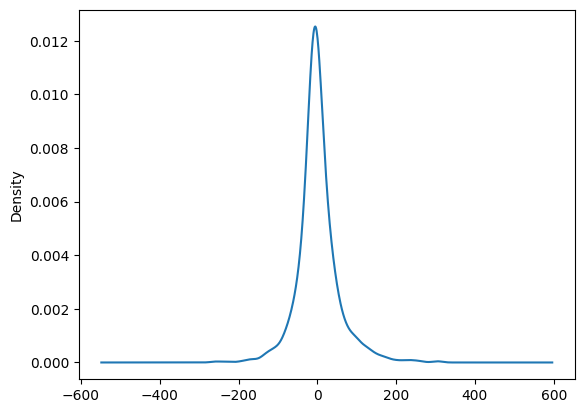

In [84]:
pd.Series(y_test - y_pred).plot(kind='kde')

In [85]:
pd.Series(y_test).describe()

count    2178.000000
mean      191.531680
std       181.719833
min         1.000000
25%        41.000000
50%       145.000000
75%       280.000000
max       977.000000
Name: total_count, dtype: float64

In [86]:
pd.Series(y_pred).describe()

count    2178.000000
mean      189.905136
std       162.312790
min       -39.575776
25%        41.329940
50%       160.344101
75%       295.015309
max       762.218638
dtype: float64

In [87]:
X_train

season   holiday  workingday   weather      temp     atemp  humidity  \
0     0.439420 -0.170265    0.676378  0.926086  0.340261  0.330471  1.980114   
1    -1.354237 -0.170265   -1.478463 -0.652272 -0.078773 -0.025935 -1.166401   
2    -0.457409 -0.170265    0.676378  0.926086  0.235502  0.241664  1.103217   
3     0.439420 -0.170265   -1.478463 -0.652272  1.283088  1.043283 -1.269565   
4    -1.354237 -0.170265    0.676378 -0.652272 -0.602566 -0.471737 -1.114819   
...        ...       ...         ...       ...       ...       ...       ...   
6526  0.439420 -0.170265    0.676378 -0.652272  0.549778  0.419867  1.361128   
6527  1.336248 -0.170265   -1.478463 -0.652272 -0.393049 -0.293534 -1.217983   
6528 -0.457409 -0.170265    0.676378 -0.652272  0.340261  0.330471 -0.960072   
6529  1.336248 -0.170265    0.676378  0.926086  0.654537  0.419867  1.670621   
6530  0.439420 -0.170265    0.676378  0.926086  0.025985  0.062872  0.793723   

      windspeed      year     month      date       day      hour      week  
0     -0.465940 -1.006298  0.719181 -0.544219 -0.512349 -0.938160  0.674764  
1      1.124574 -1.006298 -1.031134  0.553124  1.497350  0.505384 -1.065658  
2      0.268270  0.993742 -0.155977  1.467576 -1.517198 -0.360742 -0.061569  
3     -0.220930  0.993742  0.427462  1.467576  0.994926  0.938447  0.473946  
4     -1.566434  0.993742 -1.322854 -1.275780  0.492501  0.505384 -1.400354  
...         ...       ...       ...       ...       ...       ...       ...  
6526   0.512460 -1.006298  0.427462  0.918904 -1.517198 -0.793806  0.473946  
6527   0.879564 -1.006298  1.302620  1.650466  0.994926  0.649739  1.344157  
6528  -0.832225  0.993742 -0.447696  1.284685 -0.009924  1.515865 -0.396265  
6529  -1.566434  0.993742  1.010900 -1.458670 -1.014773  1.660220  0.942521  
6530   0.023260 -1.006298  0.719181  1.650466 -1.517198 -0.938160  0.808642  

[6531 rows x 14 columns]

In [88]:
X_test

season   holiday  workingday   weather      temp     atemp  humidity  \
0     0.439420 -0.170265    0.676378 -0.652272  1.702123  1.934299 -0.134757   
1    -1.354237  5.873207   -1.478463 -0.652272 -2.069187 -1.986169 -0.392668   
2     1.336248 -0.170265   -1.478463 -0.652272 -1.335877 -1.451560 -0.702161   
3     0.439420 -0.170265    0.676378  0.926086  1.178330  1.221487  0.019990   
4    -0.457409 -0.170265    0.676378 -0.652272  0.654537  0.865080 -0.444250   
...        ...       ...         ...       ...       ...       ...       ...   
2173 -0.457409 -0.170265   -1.478463  2.504445  0.445020  0.419867 -0.650579   
2174 -1.354237 -0.170265    0.676378  2.504445 -0.916842 -1.006346  0.226319   
2175  1.336248 -0.170265   -1.478463 -0.652272 -0.497808 -0.382341 -1.114819   
2176 -1.354237 -0.170265   -1.478463 -0.652272 -1.126359 -1.095154  1.000052   
2177 -0.457409 -0.170265    0.676378  2.504445  0.759295  0.776273  0.587394   

      windspeed      year     month      date       day      hour      week  
0     -1.566434 -1.006298  0.135743  1.650466 -1.014773 -0.072034  0.206189  
1     -0.832225  0.993742 -1.614573  1.101795 -1.517198 -0.793806 -1.534233  
2      0.023260 -1.006298  1.594339  0.187343  1.497350  0.938447  1.544974  
3      0.023260  0.993742  0.427462  0.918904 -0.512349 -0.216388  0.473946  
4      0.512460  0.993742 -0.155977  0.918904  0.492501  1.660220 -0.128508  
...         ...       ...       ...       ...       ...       ...       ...  
2173   0.757469 -1.006298 -0.447696 -0.361328  1.497350  0.794093 -0.530144  
2174   1.124574  0.993742 -1.614573  1.284685 -1.014773 -1.082515 -1.534233  
2175   0.023260  0.993742  1.302620 -1.092890  1.497350  0.361030  1.210278  
2176  -0.710130  0.993742 -1.614573 -1.641561  1.497350 -0.938160  1.745792  
2177   0.023260  0.993742 -0.447696  0.918904 -1.014773  0.216675 -0.396265  

[2178 rows x 14 columns]

In [89]:
np.log(y_train)

3750    2.772589
1174    5.717028
8112    5.521461
9033    6.317165
5938    5.375278
          ...   
3488    4.499810
4958    5.659482
7645    5.525453
9566    4.584967
4036    3.332205
Name: total_count, Length: 6531, dtype: float64

In [90]:
tree_reg = GradientBoostingRegressor(random_state=7, max_depth = 4, n_estimators= 100, learning_rate = 0.1 )
  #cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = 3, return_train_score = True)

  #print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean().round(3)*100} Validation: {cv_acc_results['test_score'].mean().round(3)*100}")

baseline_estimator = tree_reg.fit(X_train, np.log(y_train))
y_pred = baseline_estimator.predict(X_test)

In [91]:
y_pred

array([4.93176245, 2.17311696, 5.0610084 , ..., 5.96530562, 1.76345452,
       5.025413  ])

In [92]:
y_pred = np.e ** y_pred

In [93]:
print(f"MSE:{mse(y_test, y_pred)}\nMAPE: {mape(y_test, y_pred)}\nRMSLE: {rmsle(y_test, y_pred)}\nR2 Score: {r2(y_test, y_pred)}")

MSE:3164.910227872476
MAPE: 0.28716600663762143
RMSLE: 0.33540932207556423
R2 Score: 0.9041137826057647


In [94]:
pd.DataFrame([X_train.columns, baseline_estimator.feature_importances_])

0         1           2         3         4         5         6   \
0    season   holiday  workingday   weather      temp     atemp  humidity   
1  0.002948  0.000127    0.040854  0.011924  0.032522  0.011857   0.01097   

          7         8         9         10        11        12        13  
0  windspeed      year     month      date       day      hour      week  
1   0.002024  0.033994  0.030535  0.000759  0.033819  0.779708  0.007958

In [95]:
X

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  date  day  hour  week  
0         0.0000  2011      1     1    5     0    52  
1         0.0000  2011      1     1    5     1    52  
2         0.0000  2011      1     1    5     2    52  
3         0.0000  2011      1     1    5     3    52  
4         0.0000  2011      1     1    5     4    52  
...          ...   ...    ...   ...  ...   ...   ...  
10881    26.0027  2012     12    19    2    19    51  
10882    15.0013  2012     12    19    2    20    51  
10883    15.0013  2012     12    19    2    21    51  
10884     6.0032  2012     12    19    2    22    51  
10885     8.9981  2012     12    19    2    23    51  

[10886 rows x 14 columns]

In [96]:
from sklearn.decomposition import PCA

cs = [2, 3, 5, 8, 10, 12]
info = []
for i in cs:
    pca = PCA(n_components=i)
    vis = pca.fit_transform(X)
    info.append(pca.explained_variance_ratio_.sum())

In [97]:
X

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  date  day  hour  week  
0         0.0000  2011      1     1    5     0    52  
1         0.0000  2011      1     1    5     1    52  
2         0.0000  2011      1     1    5     2    52  
3         0.0000  2011      1     1    5     3    52  
4         0.0000  2011      1     1    5     4    52  
...          ...   ...    ...   ...  ...   ...   ...  
10881    26.0027  2012     12    19    2    19    51  
10882    15.0013  2012     12    19    2    20    51  
10883    15.0013  2012     12    19    2    21    51  
10884     6.0032  2012     12    19    2    22    51  
10885     8.9981  2012     12    19    2    23    51  

[10886 rows x 14 columns]

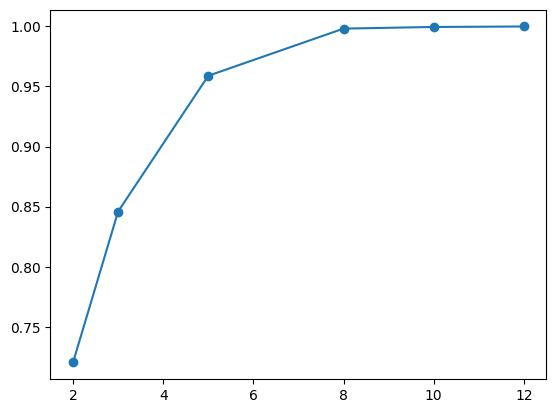

In [98]:
plt.plot(cs, info, '-o')

In [99]:
(cs,info)

([2, 3, 5, 8, 10, 12],
 [0.7203348064206571,
  0.845949750482239,
  0.9589143254233251,
  0.9981432961417269,
  0.9995043541117221,
  0.9999110173031235])

In [100]:
pca = PCA(n_components=8)

Xpca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

tree_reg = GradientBoostingRegressor(random_state=7, max_depth = 4, n_estimators= 100, learning_rate = 0.1 )
  #cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = 3, return_train_score = True)

  #print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean().round(3)*100} Validation: {cv_acc_results['test_score'].mean().round(3)*100}")

baseline_estimator = tree_reg.fit(Xpca, np.log(y_train))
y_pred = baseline_estimator.predict(X_test_pca)
y_pred = np.e ** y_pred
print(f"MSE:{mse(y_test, y_pred)}\nMAPE: {mape(y_test, y_pred)}\nRMSLE: {rmsle(y_test, y_pred)}\nR2 Score: {r2(y_test, y_pred)}")

MSE:21123.498965473882
MAPE: 1.532468582858937
RMSLE: 1.0055177037194265
R2 Score: 0.3600284785038318


In [101]:
X

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  date  day  hour  week  
0         0.0000  2011      1     1    5     0    52  
1         0.0000  2011      1     1    5     1    52  
2         0.0000  2011      1     1    5     2    52  
3         0.0000  2011      1     1    5     3    52  
4         0.0000  2011      1     1    5     4    52  
...          ...   ...    ...   ...  ...   ...   ...  
10881    26.0027  2012     12    19    2    19    51  
10882    15.0013  2012     12    19    2    20    51  
10883    15.0013  2012     12    19    2    21    51  
10884     6.0032  2012     12    19    2    22    51  
10885     8.9981  2012     12    19    2    23    51  

[10886 rows x 14 columns]

In [102]:
pca.explained_variance_ratio_.sum()

0.8919334349101704

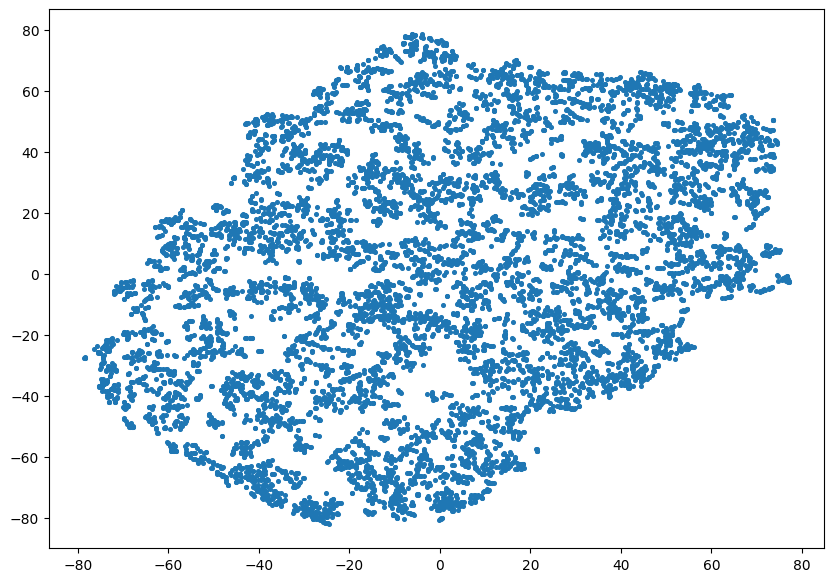

In [103]:
from sklearn.manifold import TSNE

plt.figure(figsize=(10,7))
pca = TSNE(n_components=2, perplexity=50, random_state=0)
vis = pca.fit_transform(X)
plt.scatter(vis[:,0], vis[:,1], s=7)

In [104]:
X

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  date  day  hour  week  
0         0.0000  2011      1     1    5     0    52  
1         0.0000  2011      1     1    5     1    52  
2         0.0000  2011      1     1    5     2    52  
3         0.0000  2011      1     1    5     3    52  
4         0.0000  2011      1     1    5     4    52  
...          ...   ...    ...   ...  ...   ...   ...  
10881    26.0027  2012     12    19    2    19    51  
10882    15.0013  2012     12    19    2    20    51  
10883    15.0013  2012     12    19    2    21    51  
10884     6.0032  2012     12    19    2    22    51  
10885     8.9981  2012     12    19    2    23    51  

[10886 rows x 14 columns]

In [105]:
"""import scipy.cluster.hierarchy as sch

Z = sch.linkage(vis, method='ward')

fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')"""

"import scipy.cluster.hierarchy as sch\n\nZ = sch.linkage(vis, method='ward')\n\nfig, ax = plt.subplots(figsize=(20, 12))\nsch.dendrogram(Z, ax=ax, color_threshold=2)\nplt.xticks(rotation=90)\nax.set_ylabel('distance')"

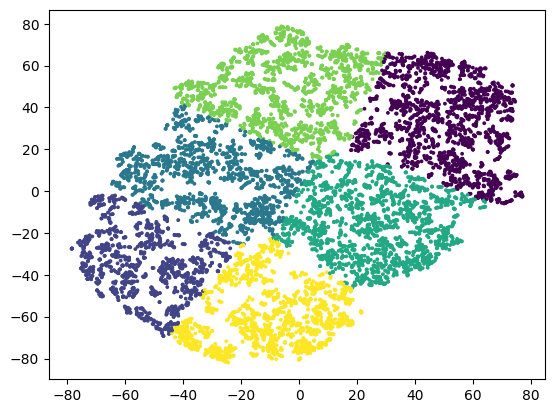

In [106]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
# kmeans.fit(ds_scaled[:, :-1])
kmeans.fit(vis)

plt.scatter(vis[:,0], vis[:,1], s=3, c=kmeans.labels_)

In [107]:
X

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  date  day  hour  week  
0         0.0000  2011      1     1    5     0    52  
1         0.0000  2011      1     1    5     1    52  
2         0.0000  2011      1     1    5     2    52  
3         0.0000  2011      1     1    5     3    52  
4         0.0000  2011      1     1    5     4    52  
...          ...   ...    ...   ...  ...   ...   ...  
10881    26.0027  2012     12    19    2    19    51  
10882    15.0013  2012     12    19    2    20    51  
10883    15.0013  2012     12    19    2    21    51  
10884     6.0032  2012     12    19    2    22    51  
10885     8.9981  2012     12    19    2    23    51  

[10886 rows x 14 columns]

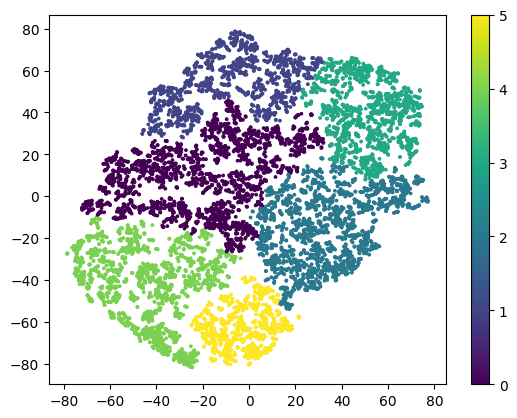

In [108]:
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').fit(vis)  #ds_scaled[:, :-1]
plt.scatter(vis[:,0], vis[:,1], s=3, c=aglo.labels_)
plt.colorbar()

In [109]:
X

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  date  day  hour  week  
0         0.0000  2011      1     1    5     0    52  
1         0.0000  2011      1     1    5     1    52  
2         0.0000  2011      1     1    5     2    52  
3         0.0000  2011      1     1    5     3    52  
4         0.0000  2011      1     1    5     4    52  
...          ...   ...    ...   ...  ...   ...   ...  
10881    26.0027  2012     12    19    2    19    51  
10882    15.0013  2012     12    19    2    20    51  
10883    15.0013  2012     12    19    2    21    51  
10884     6.0032  2012     12    19    2    22    51  
10885     8.9981  2012     12    19    2    23    51  

[10886 rows x 14 columns]

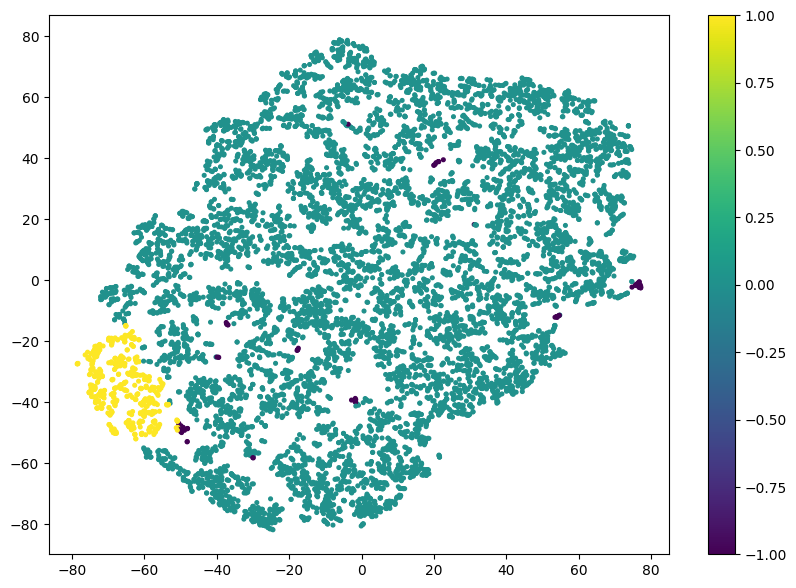

In [110]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 5.5, min_samples = 55).fit(vis)
plt.figure(figsize=(10,7))
plt.scatter(vis[:,0], vis[:,1], s=7, c=dbsc.labels_)
plt.colorbar()

In [111]:
X

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  date  day  hour  week  
0         0.0000  2011      1     1    5     0    52  
1         0.0000  2011      1     1    5     1    52  
2         0.0000  2011      1     1    5     2    52  
3         0.0000  2011      1     1    5     3    52  
4         0.0000  2011      1     1    5     4    52  
...          ...   ...    ...   ...  ...   ...   ...  
10881    26.0027  2012     12    19    2    19    51  
10882    15.0013  2012     12    19    2    20    51  
10883    15.0013  2012     12    19    2    21    51  
10884     6.0032  2012     12    19    2    22    51  
10885     8.9981  2012     12    19    2    23    51  

[10886 rows x 14 columns]

In [112]:
pd.Series(dbsc.labels_).value_counts()

 0    10289
 1      515
-1       82
dtype: int64

In [113]:
X

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  date  day  hour  week  
0         0.0000  2011      1     1    5     0    52  
1         0.0000  2011      1     1    5     1    52  
2         0.0000  2011      1     1    5     2    52  
3         0.0000  2011      1     1    5     3    52  
4         0.0000  2011      1     1    5     4    52  
...          ...   ...    ...   ...  ...   ...   ...  
10881    26.0027  2012     12    19    2    19    51  
10882    15.0013  2012     12    19    2    20    51  
10883    15.0013  2012     12    19    2    21    51  
10884     6.0032  2012     12    19    2    22    51  
10885     8.9981  2012     12    19    2    23    51  

[10886 rows x 14 columns]

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.base import BaseEstimator

In [115]:
#custom stacking

class Stacking(BaseEstimator):
    def __init__(self, estimators, final_estimator):
        self.estimators = estimators
        self.final_estimator = final_estimator


    def fit(self, X, y=None):
        for estimator in self.estimators:
            estimator[1].fit(X, y)

        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        self.final_estimator.fit(pred_features, y)

    def predict(self, X):
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.predict(pred_features)

In [116]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100,random_state=42)),
    ('gbdt', GradientBoostingRegressor(random_state=7, alpha=0.01, n_estimators= 4000))
]
final_estimator = LinearRegression() # meta

In [117]:
baseline_estimator = Stacking(estimators, final_estimator)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, y_train, X_val, y_val, X_test, y_test, scaler = preprocess(X, y)

In [119]:
baseline_estimator = Stacking(estimators, final_estimator)
baseline_estimator.fit(X_train, np.log(y_train))

In [120]:
y_pred = np.exp(baseline_estimator.predict(X_test))

In [121]:
y_true = []
y_true = np.append(y_true, np.exp(y_test))
#y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

In [122]:
y_pred

array([139.19983358,  13.69905759, 156.07194266, ..., 476.24752637,
         6.83951317, 119.04759098])

In [123]:
y_test

3133     127
5786      13
5224     163
8953     233
8054     222
        ... 
1963     351
5807       2
10061    509
5427       5
7588     239
Name: total_count, Length: 2178, dtype: int64

In [124]:
print(f"MSE:{mse(y_test, y_pred)}\nMAPE: {mape(y_test, y_pred)}\nRMSLE: {rmsle(y_test, y_pred)}\nR2 Score: {r2(y_test, y_pred)}")

MSE:1725.5690802480576
MAPE: 0.25459087210653414
RMSLE: 0.3164425928946719
R2 Score: 0.9477210157494228


In [125]:
X_train

season  holiday  workingday  weather   temp   atemp  humidity  \
2815       3        0           1        1  27.88  31.820        83   
8695       3        0           0        1  36.90  40.910        39   
8406       3        0           1        1  32.80  35.605        41   
1543       2        0           0        2  14.76  18.180        93   
4952       4        0           0        1  13.12  15.150        45   
...      ...      ...         ...      ...    ...     ...       ...   
5734       1        0           0        1   6.56   8.335        47   
5191       4        0           0        1  11.48  12.880        61   
5390       4        0           0        1  11.48  13.635        48   
860        1        0           0        1  15.58  19.695        17   
7270       2        0           1        2  22.14  25.760        88   

      windspeed  year  month  date  day  hour  week  
2815     6.0032  2011      7     6    2     5    27  
8695    19.9995  2012      8     4    5    16    31  
8406    16.9979  2012      7    11    2    15    28  
1543     7.0015  2011      4    10    6     4    14  
4952    16.9979  2011     11    19    5    10    46  
...         ...   ...    ...   ...  ...   ...   ...  
5734    11.0014  2012      1    14    5     2     2  
5191    19.0012  2011     12    10    5     9    49  
5390    16.9979  2011     12    18    6    16    50  
860     35.0008  2011      2    19    5     7     7  
7270    12.9980  2012      5     2    2     7    18  

[8708 rows x 14 columns]

In [134]:
test_df = pd.read_csv('kaggle_data/test.csv')
datetimecol = test_df['datetime']
test_df

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-20 00:00:00       1        0           1        1  10.66   
1     2011-01-20 01:00:00       1        0           1        1  10.66   
2     2011-01-20 02:00:00       1        0           1        1  10.66   
3     2011-01-20 03:00:00       1        0           1        1  10.66   
4     2011-01-20 04:00:00       1        0           1        1  10.66   
...                   ...     ...      ...         ...      ...    ...   
6488  2012-12-31 19:00:00       1        0           1        2  10.66   
6489  2012-12-31 20:00:00       1        0           1        2  10.66   
6490  2012-12-31 21:00:00       1        0           1        1  10.66   
6491  2012-12-31 22:00:00       1        0           1        1  10.66   
6492  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  
0     11.365        56    26.0027  
1     13.635        56     0.0000  
2     13.635        56     0.0000  
3     12.880        56    11.0014  
4     12.880        56    11.0014  
...      ...       ...        ...  
6488  12.880        60    11.0014  
6489  12.880        60    11.0014  
6490  12.880        60    11.0014  
6491  13.635        56     8.9981  
6492  13.635        65     8.9981  

[6493 rows x 9 columns]

In [152]:
def extract_features(df):
  # Converting to correct format(datetime) and adding necessary features
  df['datetime'] = pd.to_datetime(df['datetime'])
  df['year'] = df['datetime'].dt.year
  df['month'] = df['datetime'].dt.month
  df['date'] = df['datetime'].dt.day
  df['day'] = df['datetime'].dt.day_of_week
  df['hour'] = df['datetime'].dt.hour
  df['week'] = df['datetime'].dt.weekofyear

  # Dropping datetime column
  df.drop(columns=['datetime'], inplace = True)

  # Scaling the test data
  #X_test_final = scaler.transform(df)
  #X_test_final = pd.DataFrame(X_test_final, columns=df.columns)

  return df

In [136]:
extract_features(test_df)

season  holiday  workingday  weather   temp   atemp  humidity  \
0          1        0           1        1  10.66  11.365        56   
1          1        0           1        1  10.66  13.635        56   
2          1        0           1        1  10.66  13.635        56   
3          1        0           1        1  10.66  12.880        56   
4          1        0           1        1  10.66  12.880        56   
...      ...      ...         ...      ...    ...     ...       ...   
6488       1        0           1        2  10.66  12.880        60   
6489       1        0           1        2  10.66  12.880        60   
6490       1        0           1        1  10.66  12.880        60   
6491       1        0           1        1  10.66  13.635        56   
6492       1        0           1        1  10.66  13.635        65   

      windspeed  year  month  date  day  hour  week  
0       26.0027  2011      1    20    3     0     3  
1        0.0000  2011      1    20    3     1     3  
2        0.0000  2011      1    20    3     2     3  
3       11.0014  2011      1    20    3     3     3  
4       11.0014  2011      1    20    3     4     3  
...         ...   ...    ...   ...  ...   ...   ...  
6488    11.0014  2012     12    31    0    19     1  
6489    11.0014  2012     12    31    0    20     1  
6490    11.0014  2012     12    31    0    21     1  
6491     8.9981  2012     12    31    0    22     1  
6492     8.9981  2012     12    31    0    23     1  

[6493 rows x 14 columns]

In [137]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   year        6493 non-null   int64  
 9   month       6493 non-null   int64  
 10  date        6493 non-null   int64  
 11  day         6493 non-null   int64  
 12  hour        6493 non-null   int64  
 13  week        6493 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 710.3 KB


In [138]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  int64         
 2   holiday      10886 non-null  int64         
 3   workingday   10886 non-null  int64         
 4   weather      10886 non-null  int64         
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  total_count  10886 non-null  int64         
 12  year         10886 non-null  int64         
 13  month        10886 non-null  int64         
 14  date         10886 non-null  int64         
 15  day          10886 non-null  int64         
 16  hour

In [139]:
test_preds = np.exp(baseline_estimator.predict(test_df))

In [140]:
test_preds

array([13.71913231,  5.84050782,  3.73117672, ..., 95.83836691,
       97.22108293, 56.54675079])

<Axes: ylabel='Density'>

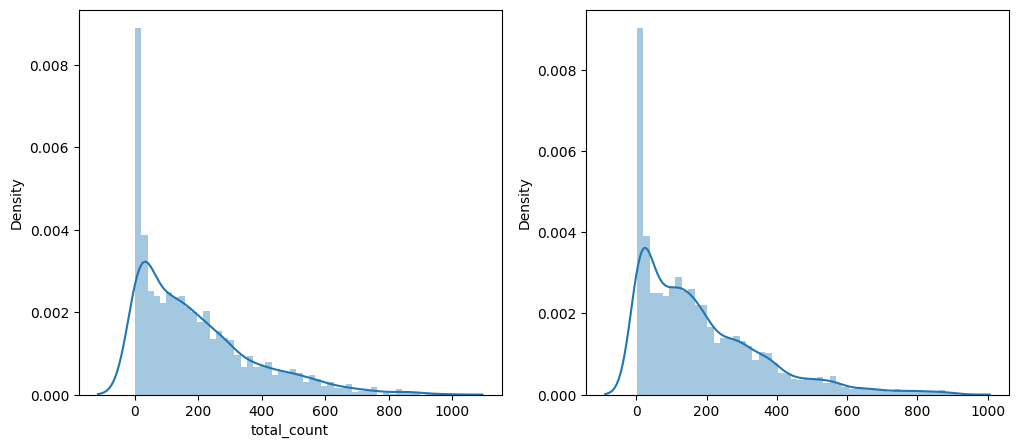

In [141]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_test,ax=ax1,bins=50)
sns.distplot(test_preds,ax=ax2,bins=50)

In [142]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in test_preds]
    })
submission.to_csv('bike_predictions_stacked.csv', index=False)

The above submission gave a score of 0.44.

-----------------

# Trying new approach

In [191]:
train = pd.read_csv('kaggle_data/train.csv')
test = pd.read_csv('kaggle_data/test.csv')

In [194]:
outliers=np.abs(train['count']-train['count'].mean()) > (3*train['count'].std())
outliers_num = len(train[outliers])
train.drop(index=train[outliers].index)
outliers_num

147

In [195]:
from datetime import datetime
import calendar

def time_process(df):
    df['year'] = pd.DatetimeIndex(df['datetime']).year
    df['month'] = pd.DatetimeIndex(df['datetime']).month
    df['day'] = pd.DatetimeIndex(df['datetime']).day
    df['hour'] = pd.DatetimeIndex(df['datetime']).hour
    df['week'] = pd.DatetimeIndex(df['datetime']).weekofyear
    df['weekday'] = pd.DatetimeIndex(df['datetime']).dayofweek
    return df

train = time_process(train)
test = time_process(test)

In [196]:
from sklearn.ensemble import RandomForestClassifier
def wind_0_fill(df):
    wind_0 = df[df['windspeed']==0]
    wind_not0 = df[df['windspeed']!=0]
    y_label = wind_not0['windspeed']

    clf = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0)
    windcolunms = ['season', 'weather', 'temp', 'atemp', 'humidity', 'hour', 'month']
    clf.fit(wind_not0[windcolunms], y_label.astype('int'))
    pred_y = clf.predict(wind_0[windcolunms])

    wind_0['windspeed'] = pred_y
    df_rfw = wind_not0.append(wind_0)
    df_rfw.reset_index(inplace=True)
    return df_rfw

train = wind_0_fill(train)
test = wind_0_fill(test)

In [197]:
dt = pd.DatetimeIndex(train['datetime'])
train.set_index(dt, inplace=True)
dtt = pd.DatetimeIndex(test['datetime'])
test.set_index(dtt, inplace=True)
def get_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")


train.loc[get_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
train.loc[get_day(pd.datetime(2012, 4, 16)), "workingday"] = 1

test.loc[get_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
test.loc[get_day(pd.datetime(2012, 11, 23)), "workingday"] = 0

test.loc[get_day(pd.datetime(2011, 12, 24)), "workingday"] = 0
test.loc[get_day(pd.datetime(2011, 12, 31)), "workingday"] = 0
test.loc[get_day(pd.datetime(2012, 12, 26)), "workingday"] = 0
test.loc[get_day(pd.datetime(2012, 12, 31)), "workingday"] = 0


train.loc[get_day(pd.datetime(2011, 4, 15)), "holiday"] = 0
train.loc[get_day(pd.datetime(2012, 4, 16)), "holiday"] = 0


test.loc[get_day(pd.datetime(2011, 11, 25)), "holiday"] = 1
test.loc[get_day(pd.datetime(2012, 11, 23)), "holiday"] = 1

test.loc[get_day(pd.datetime(2011, 12, 24)), "holiday"] = 1
test.loc[get_day(pd.datetime(2011, 12, 31)), "holiday"] = 1
test.loc[get_day(pd.datetime(2012, 12, 31)), "holiday"] = 1

test.loc[get_day(pd.datetime(2012, 5, 21)), "holiday"] = 1

train.loc[get_day(pd.datetime(2012, 6, 1)), "holiday"] = 1

In [198]:
def name_process(df):

    df['season2'] = df['season']
    df['weather2'] = df['weather']
    df['season2'] = df['season2'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
    df['weather2'] = df['weather2'].map({1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain'})
#     df['month'] = df['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
    return df

train = name_process(train)
test = name_process(test)

In [199]:
train['peak'] = train[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 12)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)
test['peak'] = test[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 12)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)

In [200]:
train=pd.get_dummies(train,columns=['season2'])
train=pd.get_dummies(train,columns=['weather2'])

test=pd.get_dummies(test,columns=['season2'])
test=pd.get_dummies(test,columns=['weather2'])

In [201]:
All_feature_columns = ['season','weather','temp','atemp','humidity','windspeed',
                        'year','holiday','workingday','month','day','hour','week','weekday','peak',
                       'season2_Fall','season2_Spring','season2_Summer','season2_Winter',
                       'weather2_Clear','weather2_Heavy_Rain','weather2_Light_Snow','weather2_Mist']

RFR_feature_columns = ['weather','temp','atemp','windspeed',
                       'workingday','season','holiday',
                       'hour','weekday','week','peak',
                       'season2_Fall','season2_Spring','season2_Summer','season2_Winter',
                      'weather2_Clear','weather2_Heavy_Rain','weather2_Light_Snow','weather2_Mist']

GBR_feature_columns =['weather','temp','atemp','humidity','windspeed',
                       'holiday','workingday','season',
                       'hour','weekday','year',
                      'season2_Fall','season2_Spring','season2_Summer','season2_Winter',
                       'weather2_Clear','weather2_Heavy_Rain','weather2_Light_Snow','weather2_Mist']


In [202]:
RFR_X_train=train[RFR_feature_columns].values
RFR_X_test=test[RFR_feature_columns].values

GBR_X_train=train[GBR_feature_columns].values
GBR_X_test=test[GBR_feature_columns].values

y_casual=train['casual'].apply(lambda x: np.log1p(x)).values
y_registered=train['registered'].apply(lambda x: np.log1p(x)).values
y_count=train['count'].apply(lambda x: np.log1p(x)).values

X_date=test['datetime'].values

In [203]:
def rmsle(y_real, y_pre):
    log1 = np.log(y_real+1)
    log2 = np.log(y_pre+1)
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [204]:
from sklearn.model_selection import train_test_split
X_train = train[All_feature_columns].values
xd_train,xd_test,yd_train,yd_test = train_test_split(X_train,y_count,random_state=0)
#Train, adjust parameters, and test various regression models
##LGBM
from lightgbm import LGBMRegressor
def LGBM_model():
    LGBM = LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=1000, max_depth=10,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)
    LGBM.fit(xd_train, yd_train)
    # Predict the value of test data
    pre_test = LGBM.predict(xd_test)
    # Calculate RMSLE
    score = rmsle(yd_test,pre_test)
    return score

##Random Forest
from sklearn.ensemble import RandomForestRegressor
def RandomForest_model():
    RFR = RandomForestRegressor(n_estimators = 1000, max_depth=15, random_state=0,n_jobs = -1)
    RFR.fit(xd_train,yd_train)
    # Predict the value of test data
    pre_test = RFR.predict(xd_test)
    # Calculate RMSLE
    score = rmsle(yd_test,pre_test)
    return score

##Decision Tree
from sklearn.tree import DecisionTreeRegressor
def DecisionTree_model():
    DTR = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=10)
    DTR.fit(xd_train,yd_train)
    # Predict the value of test data
    pre_test = DTR.predict(xd_test)
    # Calculate RMSLE
    score = rmsle(yd_test,pre_test)
    return score

##Gradient Boosting Decision Tree
from sklearn.ensemble import GradientBoostingRegressor
def GradientBoosting_model():
    GBR = GradientBoostingRegressor(n_estimators = 1000, max_depth = 5, random_state = 0)
    GBR.fit(xd_train,yd_train)
    # Predict the value of test data
    pre_test = GBR.predict(xd_test)
    # Calculate RMSLE
    score = rmsle(yd_test,pre_test)
    return score

##Logistic Regression
from sklearn.linear_model import LogisticRegression
def Logisic_model():
    LG = LogisticRegression(penalty="l2",tol=0.0001, C=1.0, solver= "lbfgs", max_iter=3000,multi_class='ovr', verbose=O)
    LG.fit(xd_train,yd_train)
    # Predict the value of test data
    pre_test = LG.predict(xd_test)
    # Calculate RMSLE
    score = rmsle(yd_test,pre_test)
    return score

##AdaBoost
from sklearn.ensemble import AdaBoostRegressor
def AdaBoost_model():
    ABR = AdaBoostRegressor(learning_rate=0.1, loss='square', n_estimators=1000)
    ABR.fit(xd_train,yd_train)
    # Predict the value of test data
    pre_test = ABR.predict(xd_test)
    # Calculate RMSLE
    score = rmsle(yd_test,pre_test)
    return score

In [205]:
print("LGBM_model:             ",LGBM_model())
print("RandomForest_model:     ",RandomForest_model())
print("DecisionTree_model:     ",DecisionTree_model())
print("GradientBoosting_model: ",GradientBoosting_model())
print("AdaBoost_model:         ",AdaBoost_model())

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 8164, number of used features: 22
[LightGBM] [Info] Start training from score 4.595897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [208]:
from sklearn.ensemble import RandomForestRegressor
params = {'n_estimators': 1000,
          'max_depth': 15,
          'random_state': 0,
          'min_samples_split' : 5,
          'n_jobs': -1}

RFR1 = RandomForestRegressor(**params)
RFR1.fit(RFR_X_train,y_casual)
print("model1 Score:",RFR1.score(RFR_X_train,y_casual))

RFR2 = RandomForestRegressor(**params)
RFR2.fit(RFR_X_train,y_registered)
print("model2 Score:",RFR2.score(RFR_X_train,y_registered))

RFR3 = RandomForestRegressor(**params)
RFR3.fit(RFR_X_train,y_count)
print("model3 Score:",RFR3.score(RFR_X_train,y_count))

model1 Score: 0.9626319689534009
model2 Score: 0.9742280635936635
model3 Score:: 0.9757046602261039


In [209]:
from sklearn.ensemble import GradientBoostingRegressor

params2 = {'n_estimators': 150,
           'max_depth': 5,
           'random_state': 0,
           'min_samples_leaf' : 10,
           'learning_rate': 0.1,
           'subsample': 0.7}

GBR1 = GradientBoostingRegressor(**params2)
GBR1.fit(GBR_X_train,y_casual)
print("model1 Score:",GBR1.score(GBR_X_train,y_casual))

GBR2 = GradientBoostingRegressor(**params2)
GBR2.fit(GBR_X_train,y_registered)
print("model2 Score:",GBR2.score(GBR_X_train,y_registered))

GBR3 = GradientBoostingRegressor(**params2)
GBR3.fit(GBR_X_train,y_count)
print("model3 Score:",GBR3.score(GBR_X_train,y_count))

model1 Score: 0.9203957622947261
model2 Score: 0.9690481215133022
model3 Score: 0.9693564748984175


In [210]:
RFR_pre_casual = RFR1.predict(RFR_X_test)
RFR_pre_casual=np.exp(RFR_pre_casual)-1
RFR_pre_registered = RFR2.predict(RFR_X_test)
RFR_pre_registered=np.exp(RFR_pre_registered)-1
RFR_pre = RFR_pre_casual+RFR_pre_registered

GBR_pre_casual = GBR1.predict(GBR_X_test)
GBR_pre_casual=np.exp(GBR_pre_casual)-1
GBR_pre_registered = GBR2.predict(GBR_X_test)
GBR_pre_registered=np.exp(GBR_pre_registered)-1
GBR_pre = GBR_pre_casual+GBR_pre_registered

submit1 = pd.DataFrame({'datetime':X_date,'count':0.2*RFR_pre+0.8*GBR_pre})
submit1.to_csv('submisssion_1.csv',index=False)

In [211]:
RFR_pre_count = RFR3.predict(RFR_X_test)
RFR_pre_count = np.exp(RFR_pre_count)-1
GBR_pre_count = GBR3.predict(GBR_X_test)
GBR_pre_count = np.exp(GBR_pre_count)-1

pre_count=0.2*RFR_pre_count+0.8*GBR_pre_count
submit2 = pd.DataFrame({'datetime':X_date,'count':pre_count})
submit2.to_csv('submisssion_2.csv',index=False)